<center>
<img src="https://dartfrog.gg/wp-content/uploads/2020/01/FIFA-20-Luis-Alberto-Bugs-INternet-1170x658.jpg"  width=60% />

## Aprendizaje No Supervisado 2020 DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2019 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.



---
Integrantes:

- Maria Emilia Fernandez 
- Alexander Joel Vivas Montolla
- Carlos Barcia
- Nicolas E Ponce
- Sergio Sulca
---

## 1.-Inicialización-del-entorno

---
**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [ ]:
import io
import itertools
import warnings
import requests
import numpy as np
import pandas as pd
import seaborn as sns
# sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import estimate_bandwidth
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [ ]:
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# visualization
import plotly.tools as tls  
import plotly.figure_factory as ff 

from plotly.offline import init_notebook_mode
from plotly.offline import plot
from plotly.offline import iplot

In [ ]:
# aux
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
sns.set_style('darkgrid')
init_notebook_mode(connected=True)

## 2.-Exploración y Limpieza de la base 2020
---

Cargamos los datos bajados de la database 2020 de [Kaggle](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv) como `'playes_20.csv'`.

Se utiliza el siguiente código para realizar la carga de los datos desde 
Google Drive ([datos](https://drive.google.com/file/d/1eMFPumwMFIBifGN5ZUuZs60ophV0vf1x/view?usp=sharing)).

In [ ]:
file_id = '1eMFPumwMFIBifGN5ZUuZs60ophV0vf1x'
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = io.StringIO(url)

In [ ]:
df = pd.read_csv(csv_raw)
df.head(4)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   

          short_name                            long_name  age         dob  \
0           L. Messi      Lionel AndrÃ©s Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia     AtlÃ©tico Madrid       91         93   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #PlaymakerÂ  , #Crosser...           CAM   
3                                                NaN            GK   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         NaN          NaN   
3        NaN     NaN       87.0         92.0        78.0         89.0   

   gk_speed  gk_positioning  \
0       NaN             NaN   
1       NaN             NaN   
2       NaN             NaN   
3      52.0            90.0   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   
1  Long Throw-in, Selfish, Argues with Officials,...                  84   
2  Power Free-Kick, Injury Free, Selfish, Early C...                  87   
3                         Flair, Acrobatic Clearance                

Eliminar columnas innecesarias para el Laboratorio.

In [ ]:
df = df.drop(columns=['player_url', 'long_name', 'real_face', 'player_tags', 
                      'loaned_from', 'joined', 'contract_valid_until', 
                      'contract_valid_until', 'nation_jersey_number', 
                      'player_traits', 'nation_position', 'team_jersey_number',
                      'body_type'])

In [ ]:
print(df.columns)
print(len(df.columns))

Index(['sofifa_id', 'short_name', 'age', 'dob', 'height_cm', 'weight_kg',
       'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'release_clause_eur',
       'team_position', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_in

### 1.1 variable `overall`

La variable `Overall` se calcula usando otras variables de desempeño del jugador (skills_ratings).

La variable `'Overall'` es discreta, así como las otras de desempeño según habilidad (`'Crossing'`, `'Finishing'`, `'HeadingAccuracy'`, etc.), tomando valores enteros entre 0 y 100.
       
Miramos ahora los mejores jugadores por posicion, usando las variables `'Overall'` y `'Position'`. 

Realizamos el histograma de la variable `"Overall"` (Desempeño global)


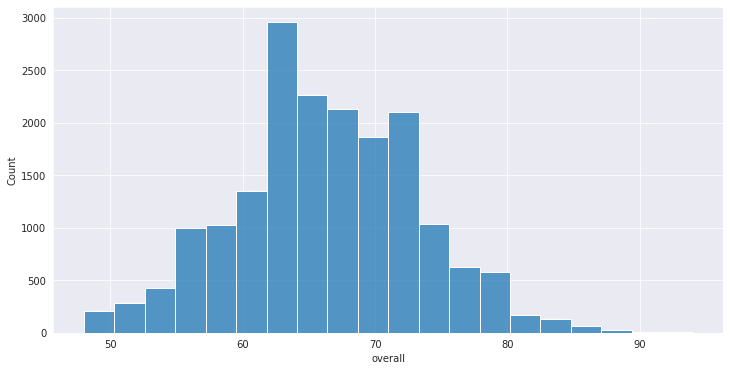

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="overall", bins=20)
plt.show()

Aqui tambien se observa la variable `overall` se encuentra Estandarizada 
con un rago minimo de 0 y un maximo de 100, esto tambien se cumple para la 
mayoria de las variables, excluyendo a las categoricas y aquellas relacionadas 
a temas finacieros.

Descripcion de la variable `overall` por pocion
 
Se muestra el rango de valores de `overall` para cada una de las pociones de
los jugadores usando la variable `team_position`.


In [ ]:
cols = ['overall', 'team_position']
df[cols].groupby('team_position').describe(percentiles=[.5])

overall                                       
                count       mean       std   min   50%   max
team_position                                               
CAM             311.0  70.340836  5.935642  53.0  70.0  92.0
CB              100.0  69.230000  6.308332  56.0  67.0  84.0
CDM             181.0  70.298343  6.270694  52.0  70.0  89.0
CF               14.0  75.214286  6.840812  65.0  76.0  87.0
CM               76.0  69.144737  6.249702  54.0  69.0  84.0
GK              662.0  69.996979  6.397805  50.0  69.0  91.0
LAM              23.0  71.608696  5.272046  62.0  71.0  82.0
LB              560.0  67.921429  5.678088  49.0  68.0  87.0
LCB             660.0  69.171212  5.880403  53.0  69.0  90.0
LCM             411.0  69.311436  6.188529  55.0  69.0  88.0
LDM             242.0  69.537190  5.027792  54.0  69.0  88.0
LF               19.0  71.000000  5.456902  63.0  72.0  82.0
LM              398.0  69.226131  5.789691  53.0  69.0  88.0
LS              195.0  69.841026  6.475995  57.0  69.0  87.0
LW              162.0  70.191358  7.163168  54.0  69.0  93.0
LWB              58.0  66.172414  6.113367  57.0  65.0  80.0
RAM              23.0  70.826087  6.853348  56.0  71.0  85.0
RB              560.0  68.294643  5.450441  50.0  68.0  86.0
RCB             660.0  69.427273  5.882191  50.0  69.0  88.0
RCM             411.0  69.257908  6.504532  50.0  69.0  91.0
RDM             244.0  69.303279  5.604069  52.0  69.0  85.0
RES            2958.0  61.231575  6.361832  48.0  61.0  85.0
RF               19.0  70.052632  6.105314  61.0  69.0  84.0
RM              399.0  69.097744  5.764470  49.0  69.0  88.0
RS              195.0  70.046154  5.913720  54.0  70.0  85.0
RW              161.0  70.341615  6.914754  52.0  70.0  94.0
RWB              58.0  67.000000  6.127304  55.0  65.5  80.0
ST              458.0  70.401747  6.038548  50.0  70.0  89.0
SUB            7820.0  65.148338  6.518481  48.0  65.0  87.0

vemos que la posicion tipo `'SUB'` en la columna `team_position`
abaraca a jugadores que juegan en distintas posiciones. 
Desde `GK` a `CM`. 

Esto tambien se repite para la team position de tipo `'RES'`

In [ ]:
cols = ['player_positions', 'team_position']
df[df.team_position == 'SUB'][cols].head(5)

player_positions team_position
48           CF, ST           SUB
53               GK           SUB
55               LW           SUB
59               CB           SUB
62      CAM, CM, LW           SUB

Existen valores nulos para la variable `team_position` 
Estos valores se trata de jugadores en codicion de **"libres"** 
Es decir jugadores que no juegan en ningun club existente en la base de datos


In [ ]:
df.team_position.isna().sum()

240

Entonces se agrega una columna con los valores los valores de `team_position`
y para los jugares libre con el la primera pocicion de `player_positions`


In [ ]:
df['position'] = df['team_position']
# 
# cols = ['player_positions']
filter = df.team_position == 'SUB'
# se queda con el primer valor de player_positions
df.loc[filter, 'position'] = df[filter]['player_positions'].apply(
    lambda row: row.split(',')[0].strip() 
)

filter = df.team_position.isna()
# se queda con el primer valor de player_positions
df.loc[filter, 'position'] = df[filter]['player_positions'].apply(
    lambda row: row.split(',')[0].strip() 
)

filter = df.team_position == 'RES'
# se queda con el primer valor de player_positions
df.loc[filter, 'position'] = df[filter]['player_positions'].apply(
    lambda row: row.split(',')[0].strip() 
)

In [ ]:
df[filter][['player_positions', 'position']].head()

player_positions position
93                ST       ST
201               GK       GK
215          CM, CDM       CM
252               CB       CB
294               GK       GK

Tratamiento para la posicion `SUB`

In [ ]:
df[df.team_position == 'SUB'][['team_position', 'position']].head()

team_position position
48           SUB       CF
53           SUB       GK
55           SUB       LW
59           SUB       CB
62           SUB      CAM

In [ ]:
df = df.drop(columns=['player_positions', 'team_position'])

Ahora si podemos hacer uso de una sola variable para la posicion

In [ ]:
df.iloc[df.groupby(df['position'])['overall'].idxmax()][['position','short_name','overall']]

position             short_name  overall
2        CAM              Neymar Jr       92
59        CB              S. Umtiti       86
21       CDM        Sergio Busquets       89
46        CF             K. Benzema       87
115       CM                 Arthur       84
3         GK               J. Oblak       91
306      LAM                 Taison       82
51        LB             Jordi Alba       87
7        LCB            V. van Dijk       90
33       LCM            David Silva       88
24       LDM               P. Pogba       88
259       LF            K. Demirbay       82
38        LM          P. Aubameyang       88
54        LS             L. Insigne       87
1         LW      Cristiano Ronaldo       93
483      LWB         M. Halstenberg       80
95       RAM              H. Ziyech       85
61        RB             J. Kimmich       86
29       RCB                 PiquÃ©       88
5        RCM           K. De Bruyne       91
78       RDM  S. MilinkoviÄ-SaviÄ       85
109       RF             K. Havertz       84
27        RM             C. Eriksen       88
104       RS             Iago Aspas       85
0         RW               L. Messi       94
476      RWB         P. KadeÅÃ¡bek       80
12        ST                H. Kane       89

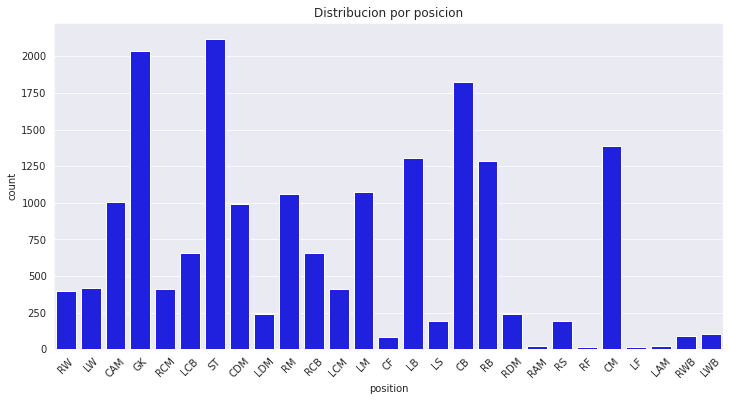

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="position", color='b')
plt.title('Distribucion por posicion')
plt.xticks(rotation=45)
plt.show()

### 1.2 Limpieza de las variables desde `ls` a `rb`

Lo hacemos utilizando expresiones regulares la expresion `(.+?(?=\+))`
extrae solo la informacion previa al signo `+`.

Ejm `90+3` se queda con solo `90` 

Esto lo hacemos con todas la variables desde `ls` a `rb`


In [ ]:
cols = ['ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

for var in cols:
    df[var] = df[var].str.extract(r'(.+?(?=\+))')
    df[var].fillna(value='0', inplace=True)
# end for

llenar valores Nulos 

In [ ]:
for var in cols:
    df[var].fillna(value='0', inplace=True)

for var in cols:
    df[var] = pd.to_numeric(df[var])

In [ ]:
df[cols].head(5)

ls  st  rs  lw  lf  cf  rf  rw  lam  cam  ram  lm  lcm  cm  rcm  rm  lwb  \
0  89  89  89  93  93  93  93  93   93   93   93  92   87  87   87  92   68   
1  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81  88   65   
2  84  84  84  90  89  89  89  90   90   90   90  89   82  82   82  89   66   
3   0   0   0   0   0   0   0   0    0    0    0   0    0   0    0   0    0   
4  83  83  83  89  88  88  88  89   89   89   89  89   83  83   83  89   66   

   ldm  cdm  rdm  rwb  lb  lcb  cb  rcb  rb  
0   66   66   66   68  63   52  52   52  63  
1   61   61   61   65  61   53  53   53  61  
2   61   61   61   66  61   46  46   46  61  
3    0    0    0    0   0    0   0    0   0  
4   63   63   63   66  61   49  49   49  61

### 1.3 Tratamiento de valores nulos
Los valores se llenan con `0`

In [ ]:
cols = ['pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning']

for var in cols:
  df[var].fillna(value='0', inplace=True)

for var in cols:
  df[var] = pd.to_numeric(df[var])

In [ ]:
df.isna().sum()

sofifa_id                        0
short_name                       0
age                              0
dob                              0
height_cm                        0
weight_kg                        0
nationality                      0
club                             0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
work_rate                        0
release_clause_eur            1298
pace                             0
shooting                         0
passing                          0
dribbling                        0
defending                        0
physic                           0
gk_diving                        0
gk_handling                      0
gk_kicking                       0
gk_reflexes                      0
gk_speed            

## 2.Evaluación visual e intuitiva de a dos variables por vez.
---


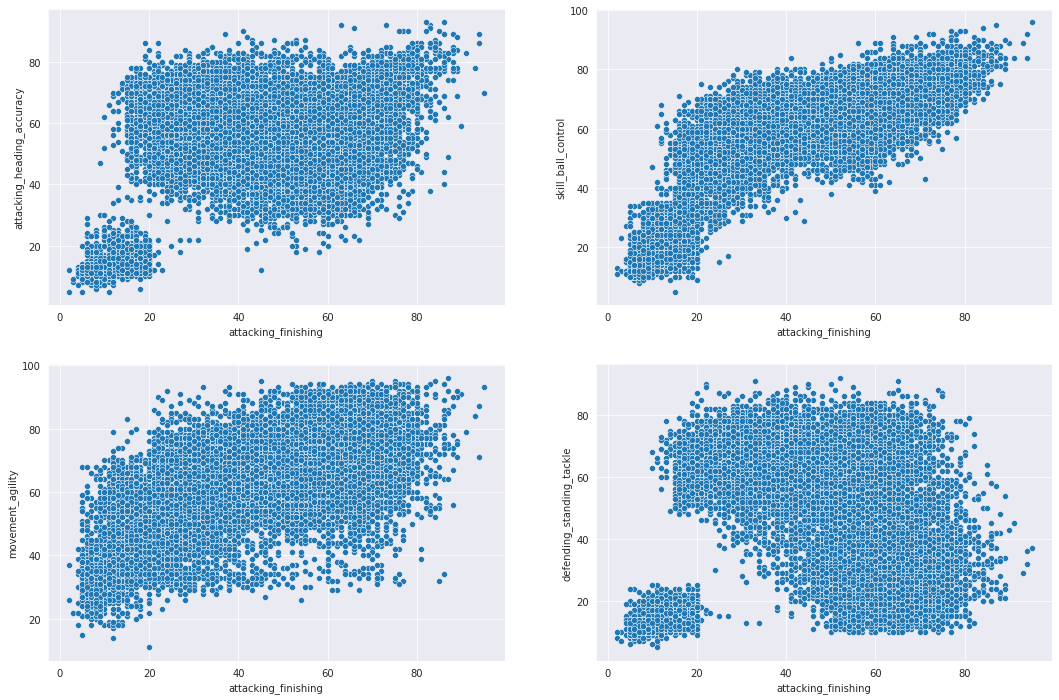

In [ ]:

fig = plt.figure(figsize=(18,12))
ax = plt.subplot(2, 2, 1)
sns.scatterplot(
    x='attacking_finishing', y='attacking_heading_accuracy', 
    data=df, ax=ax)
ax = plt.subplot(2, 2, 2)
sns.scatterplot(
    x='attacking_finishing', y='skill_ball_control', 
    data=df, ax=ax)
ax = plt.subplot(2, 2, 3)
sns.scatterplot(
    x='attacking_finishing', y='movement_agility', 
    data=df, ax=ax)
ax = plt.subplot(2, 2, 4)
sns.scatterplot(
    x='attacking_finishing', y='defending_standing_tackle', 
    data=df, ax=ax)

plt.show()
# attacking_finishing
# mentality_positioning

En base a una Evaluación visual dada variables como 
* `attacking_finishing` y `attacking_heading_accuracy` 
* `attacking_finishing` y `defending_standing_tackle`

Se puede observar dos grupos separados, uno es el de los arqueros (`GK`)
y el del resto de jugadores.

## 3.clustering: 
---

* k-Medias
* Mean Shift, 

agregar alguna jerárquica vista en el teórico (sugerencia: usar 'cityblock' como distancia en el jerárquico).


### 3.1 K-Medias

**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

In [ ]:
df[['gk_kicking','goalkeeping_kicking']]

gk_kicking  goalkeeping_kicking
0             0.0                   15
1             0.0                   15
2             0.0                   15
3            78.0                   78
4             0.0                    6
...           ...                  ...
18273         0.0                   13
18274         0.0                   14
18275         0.0                   10
18276         0.0                   13
18277         0.0                   14

[18278 rows x 2 columns]

Como las variables que comienzan con `gk_` y `goalkeeping_` son redundantes,
decidimos quedarnos sólo con una de ellas

In [ ]:
cols = [
       # 'sofifa_id', 'short_name', 'age', 'dob', 'height_cm', 'weight_kg',
       # 'nationality', 'club',
        'overall', 'potential',
       # 'value_eur', 'wage_eur',
       # 'player_positions', 'preferred_foot', 'international_reputation',
       # 'weak_foot', 'work_rate', 'release_clause_eur', 'team_position',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
       #'gk_diving', 'gk_handling', 'gk_kicking',
       #'gk_reflexes', 'gk_speed', 'gk_positioning', 'ls', 'st', 'rs',
       #'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       #'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       #'rcb', 'rb'
       #]

x = df[cols]
x.fillna(0, inplace=True)

In [ ]:
scores = [KMeans(
    n_clusters=i+2, n_jobs=6, random_state=42
    ).fit(x).inertia_ for i in range(8)]

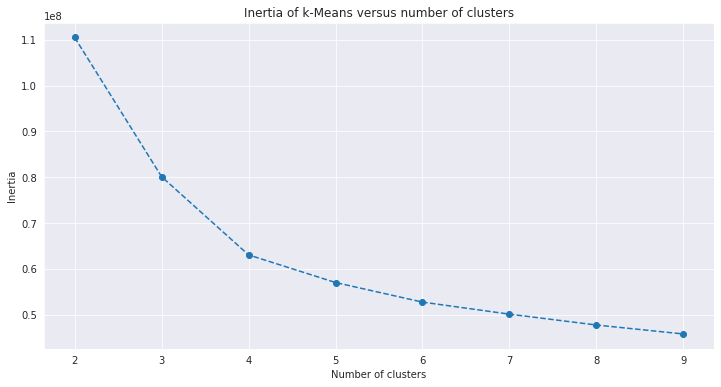

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(2, 10), scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.show()

En base al analisis del Codo para la inercia, la candidad de grupos en donde se hay un cambio evidente en la inercia se encuentra en 4 y 6 grupos.

In [ ]:
def silhouette_plt(x, cluster_labels, n_clusters, ax1):
    """
    Realiza un grafico de silueta
    """
    
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                          ith_cluster_silhouette_values, facecolor=color,
                          edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    # endfor
    
    ax1.set_title(f"Visualizacion de los datos {n_clusters} clusters.")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    return ax1

Para n_clusters = 4 El silhouette_score promedio es : 0.3045499197163767
Para n_clusters = 5 El silhouette_score promedio es : 0.2727420680255287
Para n_clusters = 6 El silhouette_score promedio es : 0.2376072832290158


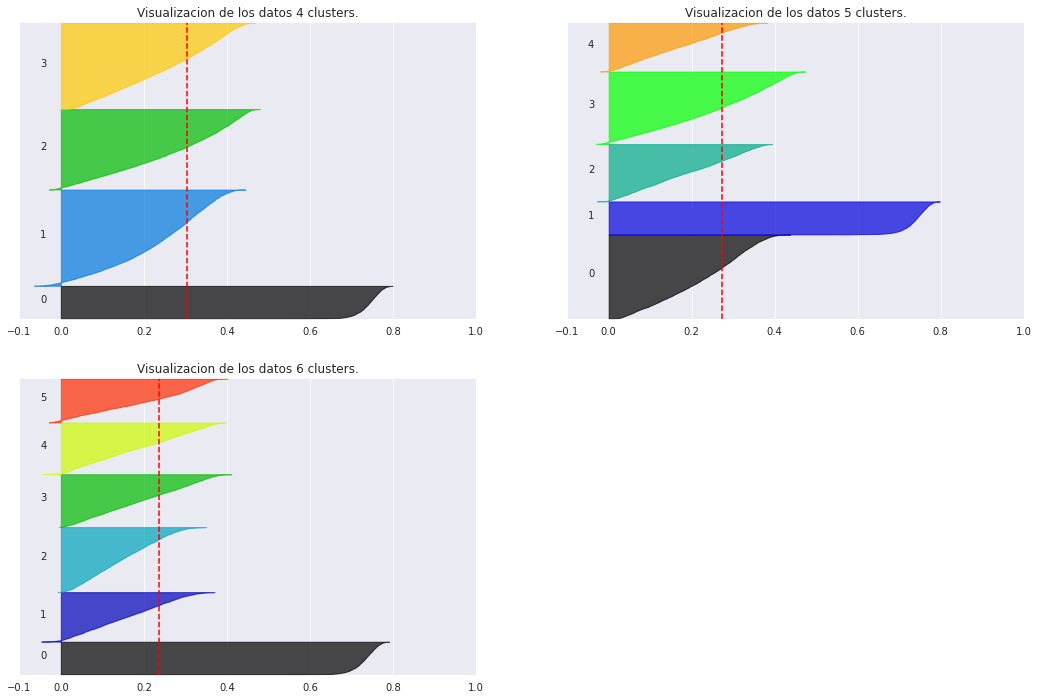

In [ ]:
range_n_clusters = [4, 5, 6]
index = 0

fig = plt.figure(figsize=(18, 12))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    index += 1
    ax1 = plt.subplot(
        len(range_n_clusters)/2 + len(range_n_clusters)%2, 2, index)

    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_jobs=4)
    cluster_labels = clusterer.fit_predict(x)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    ax1 = silhouette_plt(x, cluster_labels, n_clusters, ax1)
   # end for

plt.show()


Sin seleccionar variables, los clusters que se forman son 4 ó 6. Igualmente, en ambos casos el análisis de silueta indica que hay observaciones que están mal clasifcadas (indicado por valores negativos)

En base al analisis de silueta el que menor numero de valores negativos tiene
es usando 5 grupos, ya que este tiene los cluster mas balanceados.

In [ ]:
cluster_1 = KMeans(
    n_clusters=5, random_state=42, n_jobs=6, n_init=42).fit_predict(x)
clusters = pd.DataFrame(cluster_1, columns=['kmean'])

### 3.2 Mean shift

Si los datos se suponen muestreados de una distribución de
probabilidad, KDE es un estimador no paramétrico de la densidad
asociada a dicha distribución. KDE aplica un `kernel`, esto es, una función de peso, en una ventana alrededor del punto con un ancho de banda (`bandwidth`) determinado.
Sumando todos las estimaciones individuales de los pesos de cada entorno
se obtiene el estimador de la densidad.

Para generar la partición, el algoritmo `Mean-Shift` Clustering va
deslizando la ventana y computando el promedio de los datos pesados
por el kernel, para localizar las áreas de alta densidad.
Se va cambiando la media hacia el punto donde esta el centro del area de mayor densidad.

Cada moda de la densidad va a ser considerada un centroide, y los
puntos de la partición van a ser asignados al centroide más próximo.

El algoritmo supone una distribucion de probabilidad que tiene modas distintas
y que cada moda es el agrupamiento. 



**Primero** 

Hacemos una busqueda mas fina del parametro `bandwidth`



In [ ]:
bandwidth = estimate_bandwidth(x, random_state=42, n_jobs=6)
bandwidth

110.12921746860462

In [ ]:
ms = MeanShift(bandwidth=bandwidth, n_jobs=6).fit(x) # 84

clusters_2 = ms.labels_
# cluster_centers = ms.cluster_centers_
labels_unique = np.unique(clusters_2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 2


In [ ]:
clusters['mshift'] = clusters_2

In [ ]:
silhouette_avg = silhouette_score(x, clusters_2)
print(
    f"Para Mean Shift n_clusters = {n_clusters_} \n",
    f"El silhouette_score promedio es : {silhouette_avg}"
)

Para Mean Shift n_clusters = 2 
 El silhouette_score promedio es : 0.6133599527471024


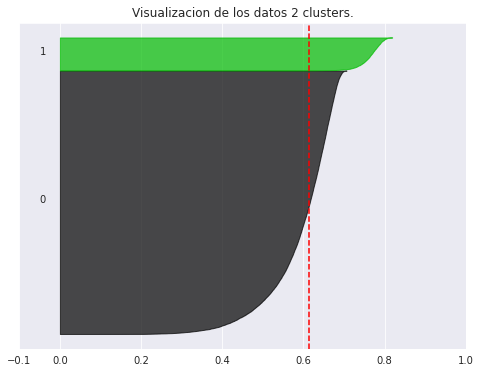

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(1,1,1)

ax1 = silhouette_plt(x, clusters_2, n_clusters_, ax1)

plt.show()

En base al analsisi de silueta para Mean Shift solo encuentra 2 grupos
los cuales se encuentran separados y sin valores negativos.

### 3.2 DBSCAN

In [ ]:
x_scaled = MinMaxScaler().fit_transform(x)

In [ ]:
dbscan = DBSCAN(eps=5, metric='cityblock', min_samples=4).fit(x_scaled)
clusters['dbscan'] = dbscan.labels_ 
n_clu = clusters['dbscan'].nunique() 

Para DBSCAN n_clusters = 2 
 El silhouette_score promedio es : 0.6133599527471024


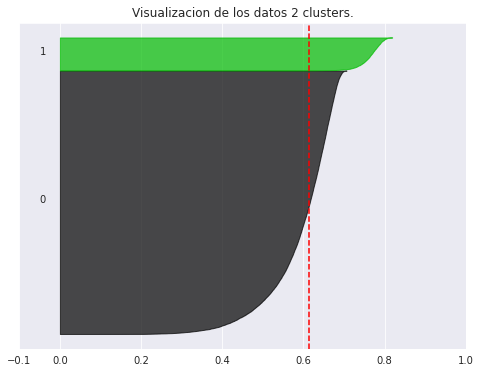

In [ ]:
silhouette_avg = silhouette_score(x, clusters['dbscan'])
print(
    f"Para DBSCAN n_clusters = {n_clu} \n",
    f"El silhouette_score promedio es : {silhouette_avg}")

fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(1,1,1)

ax1 = silhouette_plt(x, clusters['dbscan'], n_clu, ax1)

plt.show()

`DBSCAN` Encuentra los mismos grupos que Mean Shift 

### 3.2 Agglomerative Clustering


Al comenzar, cada objeto es su propio cluster
- Se define una noción de semejanza entre clusters usando la similaridad o
medida entre elementos
- Se unen en un solo cluster el par de clusters más semejantes
- La historia de uniones forma un árbol binario ( jerarquía)

Metricas

* `affinity` = pseudometrica, es la que mira los elementos
* `linkage` = une los clusters


Para n_clusters = 2 El silhouette_score promedio es : 0.6133599527471024
Para n_clusters = 3 El silhouette_score promedio es : 0.2613877780589279
Para n_clusters = 4 El silhouette_score promedio es : 0.20033195482812563
Para n_clusters = 5 El silhouette_score promedio es : 0.2099522916839079


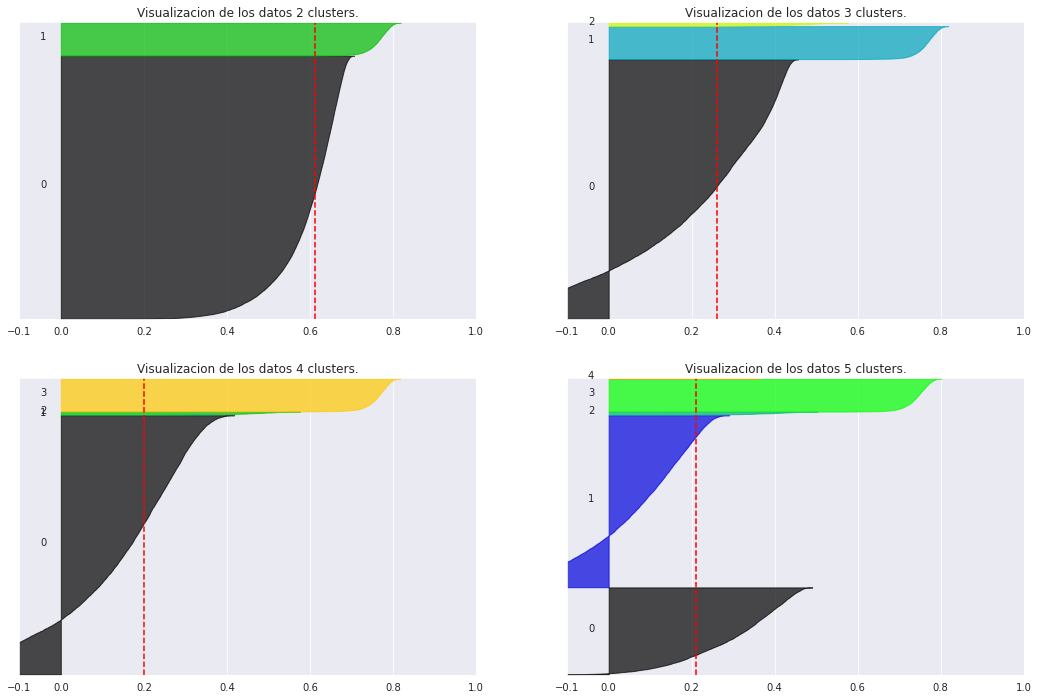

In [ ]:
range_n_clusters = [2, 3, 4, 5]
index = 0

fig = plt.figure(figsize=(18, 12))

for n_clusters in range_n_clusters:
    index += 1
    ax1 = plt.subplot(
        len(range_n_clusters)/2 + len(range_n_clusters)%2, 2, index)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = AgglomerativeClustering(
        n_clusters=n_clusters, linkage="average", affinity="cityblock"
        )
    cluster_labels = clusterer.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)
    ax1 = silhouette_plt(x, cluster_labels, n_clusters, ax1)
   # end for

plt.show()

En base al analisis de silueta se puede ovservar que para los cluster aglomerativos la cantidad de grupos que mejor balance tiene entre grupos es 2, 
al igual que mean shift y DBSCAN

In [ ]:
agg = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="cityblock").fit(x_scaled)
clusters['agg'] = agg.labels_

## 4 Análisis de los clusters encontrados.
---

Configure plot graphs

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=14)

def lploter(df, x, clusters, method='kmean', skill_1='attacking_finishing', 
            skill_2='defending_standing_tackle'):

    bool_crack = df["overall"] > 87

    fig = plt.figure(figsize=(12, 10))
    ax = plt.subplot(1,1,1)

    sns.scatterplot(x=skill_1, y=skill_2, data=x, hue=clusters[method],
                ax=ax, palette="deep")

    label_point(
        x[bool_crack][skill_1], x[bool_crack][skill_2], 
        df[bool_crack].short_name, plt.gca())  
    ax.set_title(f'Clustering {method}')
    plt.show()

### 4.1 K-means

In [ ]:
config = {"displayModeBar": False, "showTips": False, 
          'displaylogo': False, 'responsive': False, 'staticPlot': True, 
          'toImageButtonOptions': {'format': 'png'},
          'editable': False}
renderer = 'notebook' 

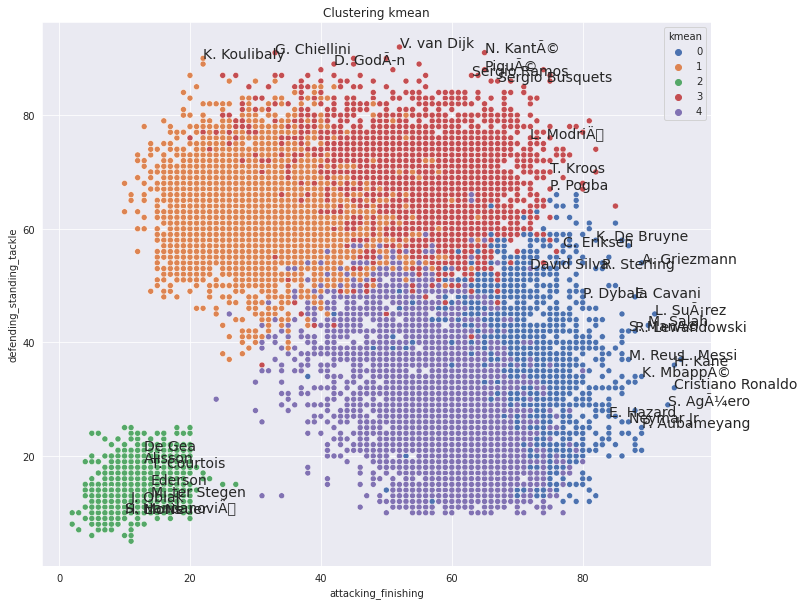

In [ ]:
lploter(df, x, clusters, method='kmean', 
            skill_1='attacking_finishing', 
            skill_2='defending_standing_tackle')

la variable finishig permite distinguir los delanteros del resto de los 
juagadores y parcialmente diferenciar mediocampistas de ataque de los
defensivos.
  

In [ ]:
clusters.kmean.value_counts()

3    5212
1    4478
4    3536
0    3016
2    2036
Name: kmean, dtype: int64

Se muestra la cantidad de observaciones por cluster

Interpertacion

Un poco de análisis visual supervisado usando tsne

Ponemos a prueba la intuición o preconcepto de que los jugadores se agrupan en el espacio de las habilidades

 (transformado/reducido por tsne) según la posición...

<img src="https://www.football-bible.com/images/image/soccer-positions-diagram.jpg"  width=50% />


Creamos una nueva columna con 4 categorias de posiciones:

In [ ]:
def pos2(position):
  forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
  midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
  defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
  goalkeepers=['GK']
  
  if position in forwards:
    return 'Forward'
  elif position in midfielders:
    return 'Midfielder'
  elif position in defenders:
    return 'Defender'
  elif position in goalkeepers:
    return 'GK'
  else:
    return 'nan'

In [ ]:
df["gposition"]=df["position"].apply(lambda x: pos2(x))

df["gposition"].value_counts()

Defender      5926
Forward       5497
Midfielder    4819
GK            2036
Name: gposition, dtype: int64

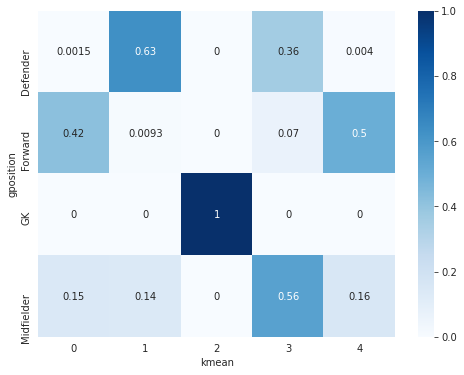

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['gposition'], clusters['kmean'], normalize='index')
                        ,cmap="Blues", annot=True)
plt.show()

En base al grafico anterior se puede observar que los grupos encontrados por kmeans esta agrupando claramete los arqueros, los defensores estan divididos en 2 grupos (1 y 3) asi tambien los delanteros en 2 grupos (0, 4) mientras que los medios se encuentran en la mayoria en el grupo 3.

**Defensas**:

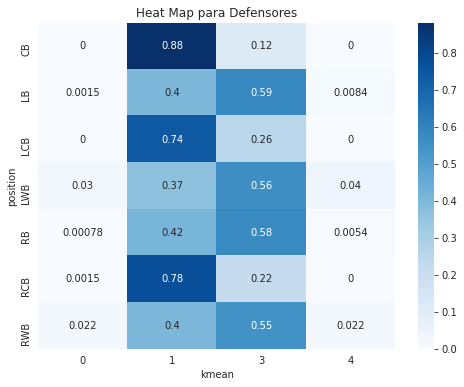

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(df[df.gposition == 'Defender'].position, clusters['kmean'],
                normalize='index'), cmap="Blues", annot=True)
plt.title('Heat Map para Defensores')
plt.show()

De acuerdo a Kmeans al tener los defensa en dos grupos esta dividiendo a 

**los defensor laterales de los defensores centrales.** 
ya que `LB` `LWB` `RB` `RWB` son laterales. y la mayoria se encuentra en el mismo grupo.

Entoces pordes decir que el `grupo 3` son jugadores con caracteristicas defensivas que juegan a los costados de la cancha y que son capaces de jugar hasta el area del equipo contrario.

Para el `grupo 2`, se encuentra jugadores con caracteriscias defensivas centrales, (defensores puros)


**Medios**


<img src="https://www.fifplay.com/img/public/position-rb.jpg"  
width=35%/>



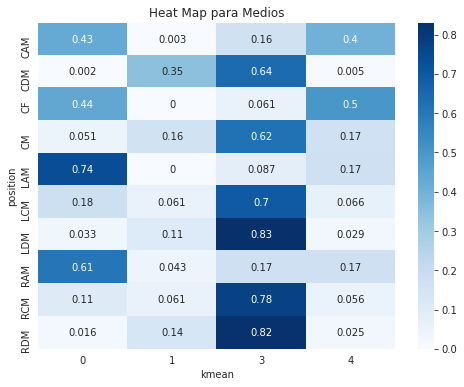

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(df[df.gposition == 'Midfielder'].position, clusters['kmean'],
                normalize='index'), cmap="Blues", annot=True)
plt.title('Heat Map para Medios')
plt.show()

`CMD` es una posicion que si bien es mediocampo este tiene carcateristicas defensivas y tambien es capas de llegar al area rival, por ende se encuentra la mayoria se encuentra en el mismo grupo de los laterales y los defensores centrales.

EL `grupo 0` son jugadores que son medios pero tienen caracteristicas de ataque.

El `grupo 4` son jugadores que son medios que tienen caracteristicas de ataque y ademas que juegan mas cerca al area rival. 

**Delanteros**

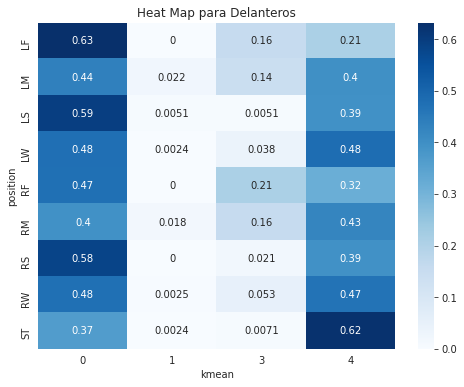

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(df[df.gposition == 'Forward'].position, clusters['kmean'],
                normalize='index'), cmap="Blues", annot=True)
plt.title('Heat Map para Delanteros')
plt.show()

Por ultimo son los delanteros que claramente estan divididos en 2 grupos 

el `grupo 4`, agrupa a jugadores que en ubican en la poscion de delantero centro

el `grupo 0` son jugadores que rodean a los delanteros centrales, tanto aquellos que jugan mas retrasados como aquellos que juegan por los laterales.  

### 4.2 Mean Shift



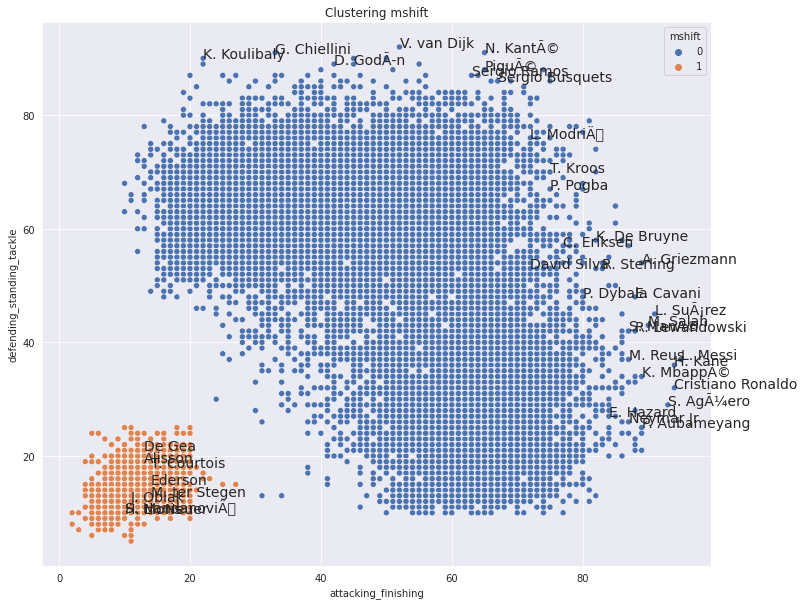

In [ ]:
lploter(df, x, clusters, method='mshift', 
            skill_1='attacking_finishing', 
            skill_2='defending_standing_tackle')

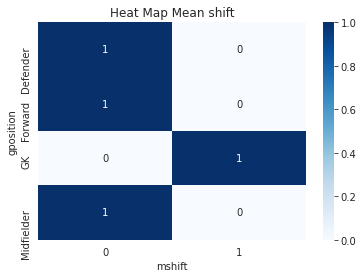

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    pd.crosstab(df['gposition'], clusters['mshift'], normalize='index'),
     cmap="Blues", annot=True)
plt.title('Heat Map Mean shift')
plt.show()

Para el caso `Mean Shift` solo separa los arqueros del resto de los jugadores.

### 4.3 DBSCAN

Como se puede ver DBSCAN, tiene 4 grupos pero la mayoria sob grupos de pocos
elementos, por lo tanto no amerita un analisis mas profundo

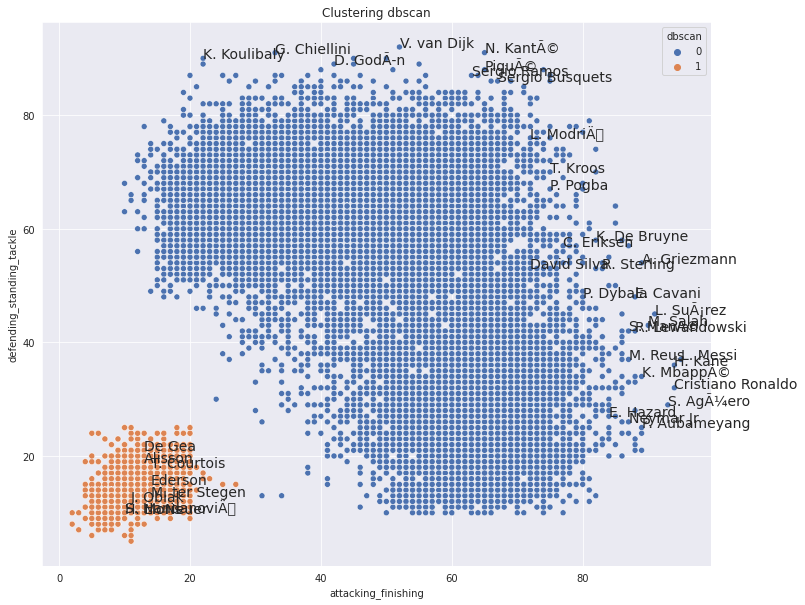

In [ ]:
lploter(df, x, clusters, method='dbscan', 
            skill_1='attacking_finishing', 
            skill_2='defending_standing_tackle')

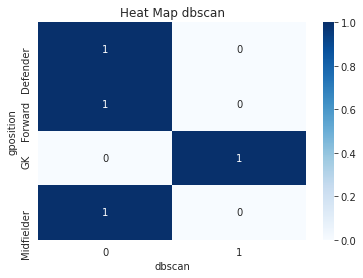

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    pd.crosstab(df['gposition'], clusters['dbscan'], normalize='index'),
     cmap="Blues", annot=True)
plt.title('Heat Map dbscan')
plt.show()

### Agglomerative Clustering

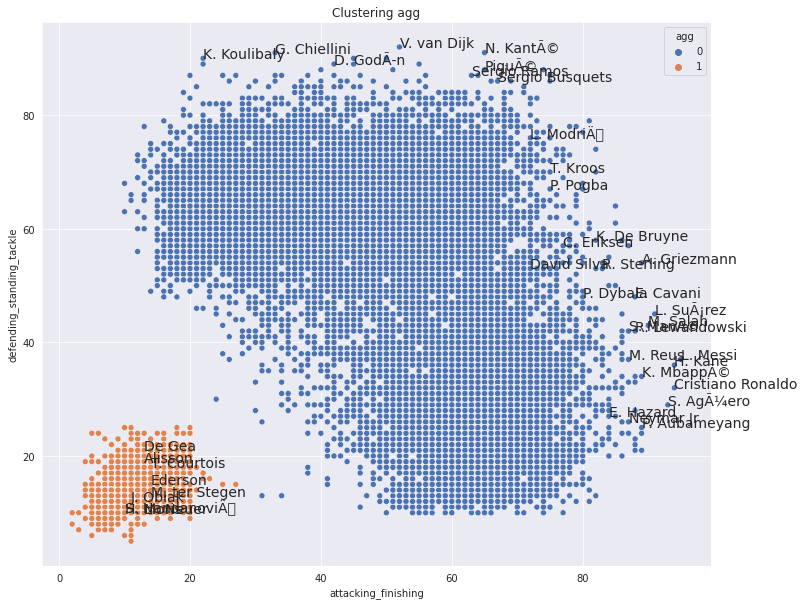

In [ ]:
lploter(df, x, clusters, method='agg', 
            skill_1='attacking_finishing', 
            skill_2='defending_standing_tackle')

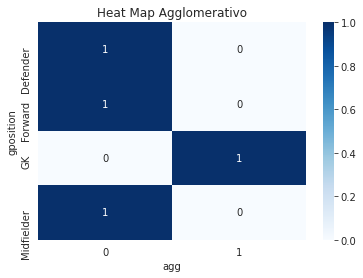

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    pd.crosstab(df['gposition'], clusters['agg'], normalize='index'),
     cmap="Blues", annot=True)
plt.title('Heat Map Agglomerativo')
plt.show()

## 5 Embeddings y técnicas de clustering.
---

Son proyecciones cuyo objetivo es; a partir de espacio original,encontrar un espacio en donde la separacion etre grupos se distinga mas.

### 5.1 tSNE

**t-distributed Stochastic Neighbor Embedding.** 

t-SNE es una herramienta para visualizar datos altamente dimensionales.
Los "proyecta" en menos dimensiones (2D o 3D) manteniendo la distancia entre ellos.

Consideramos: 

filas/observaciones $x_i$ y $x_j$ (jugador i y jugador j) en $R^n$. 
Comienza convirtiendo distancias entre puntos (observaciones) en probabilidades condicionales.

$d(x_i,x_j) \rightarrow p(x_j|x_i)$,

Y luego va acomodando puntos asociados (en el plano 2D o el espacio 2D) que "ajusten" las probabilidades condicionales.

"$x'_i$ y $x'_j$ en $R^2$  (para el jugador i y jugador j ) $p(x'_j|x'_i) \leftrightarrow d(x'_i,x'_j)$

$p(x_j|x_i) \approx p(x'_j|x'_i)$ 

El ajuste consiste en minimizar la divergencia the Kullback-Leibler entre las probabilidades condicionales establecidas en el espacio de mayor dimension y las determinadas en el espacio de menor dimension.

El modelo de distribución de probabilidad es el de t-Student
 t-SNE tiene una función de costo que no es convexa, por lo cual diferentes inicializaciones pueden dar diferentes resultados.

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, n_jobs=6)
x_tsne = tsne.fit_transform(x_scaled)

In [ ]:
x_tsne = pd.DataFrame(x_tsne, columns=['0', '1'])

Las variables que usamos para el scatterplot son las 2 componentes dadas por tSNE

agregamos los nombres de los ckack ("Overall" más de 85) y vemos una tercera variable recorriendo los puntos sobre el gráfico

Graficamos

Las variables que usamos para el scatterplot son las 2 componentes dadas por tSNE

diferenciamos usando vectores booleanos: para cada posición y si es un ckack

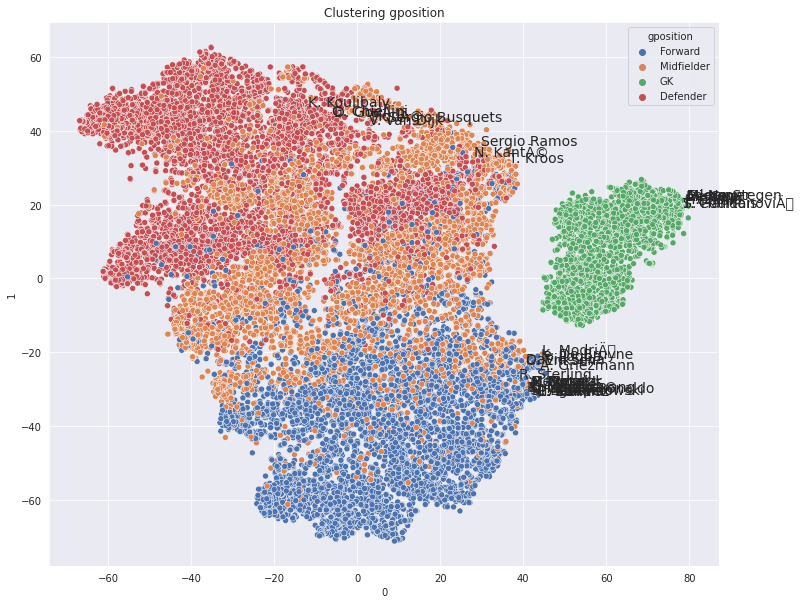

In [ ]:
lploter(df, x_tsne, df, method='gposition', skill_1='0', skill_2='1')

Como **conclusión**, podemos observar que en este espacio 2D es muy evidente la separación de los arqueros del resto de los jugadores. Esto es lógico pues sus habilidades son muy diferentes al resto de los jugadores, y lo vimos también en la primera semana de clases en dimensión 34, graficando de a dos variable por vez.

El agrupamiento visual, en este espacio, de los jugadores no es tan evidente pues los clusters no son disconexos.

Las posiciones no explican tan claramente los clusters encontrados

Una explicación posible puede ser porque hay jugadores ambivalentes que unen los espacios entre defensa, mediocampo y ataque.

Habrá otra explicación??

Que otras variables (que no estamos graficando) pueden explicar los grupos?

#### Clustering K means
 En este espacio tsne ... es decir usando "X_tsne[:,0]" y "X_tsne[:,0]" Cuantos grupos encontrará Mean Shift? o cuales k-medias? hacerlo para el práctico con los datos FIFA2020

In [ ]:
cluster = KMeans(
    n_clusters=4, random_state=42, n_jobs=4, n_init=42).fit_predict(x_tsne)
cluster_tsne = pd.DataFrame(cluster, columns=['kmean'])

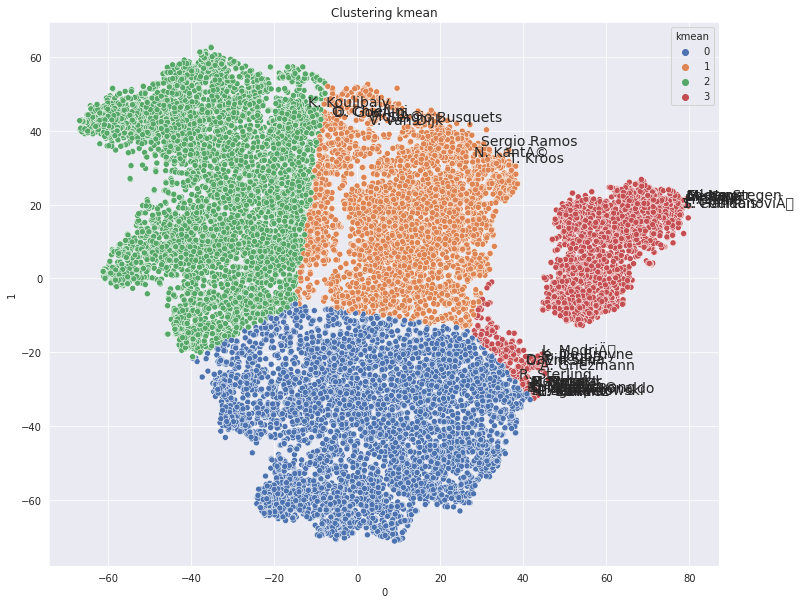

In [ ]:
lploter(df, x_tsne, cluster_tsne, method='kmean', skill_1='0', skill_2='1')

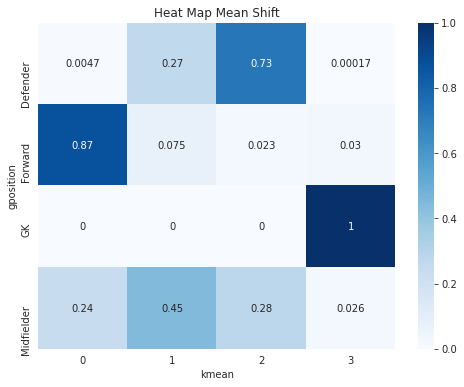

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(df['gposition'], cluster_tsne['kmean'], normalize='index'),
     cmap="Blues", annot=True)
plt.title('Heat Map Mean Shift')
plt.show()

Com se observa en el mapa anterior k means hace una division entre posiciones 
pero hace una mala agrupacion al asignar jugadores de campo al grupo de los arqueros.

#### Clustering Mean Shift

In [ ]:
ms = MeanShift(bandwidth=27, n_jobs=6) # 84

ms.fit(x_tsne)

cluster = ms.labels_
# cluster_centers = ms.cluster_centers_

labels_unique = np.unique(cluster)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 5


In [ ]:
cluster_tsne['mshift'] = cluster

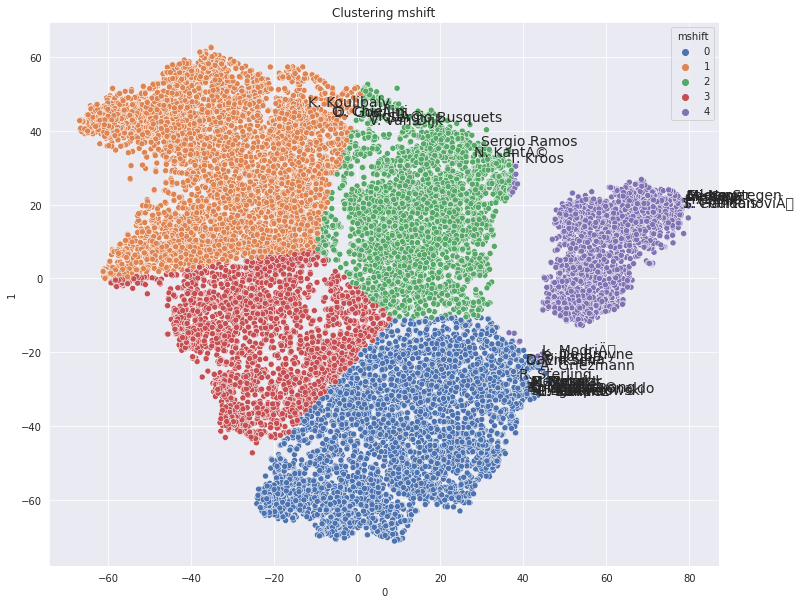

In [ ]:
# embplot(df, x_tsne, cluster_tsne, method='mshift')
lploter(df, x_tsne, cluster_tsne, method='mshift', skill_1='0', skill_2='1')

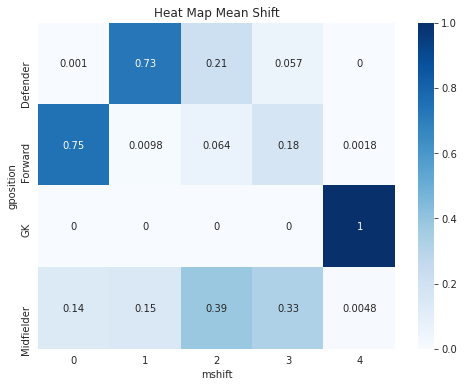

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(df['gposition'], cluster_tsne['mshift'], normalize='index'),
     cmap="Blues", annot=True)
plt.title('Heat Map Mean Shift')
plt.show()

Mean shift hace una mejor division compara con kmeans a pesar de los jugadores asignados al grupos de los arqueros.

#### Clustering Aglomeritivos

In [ ]:
agg = AgglomerativeClustering(
        n_clusters=4, linkage="average", affinity="cityblock").fit(x_tsne)
cluster_tsne['agg'] = agg.labels_

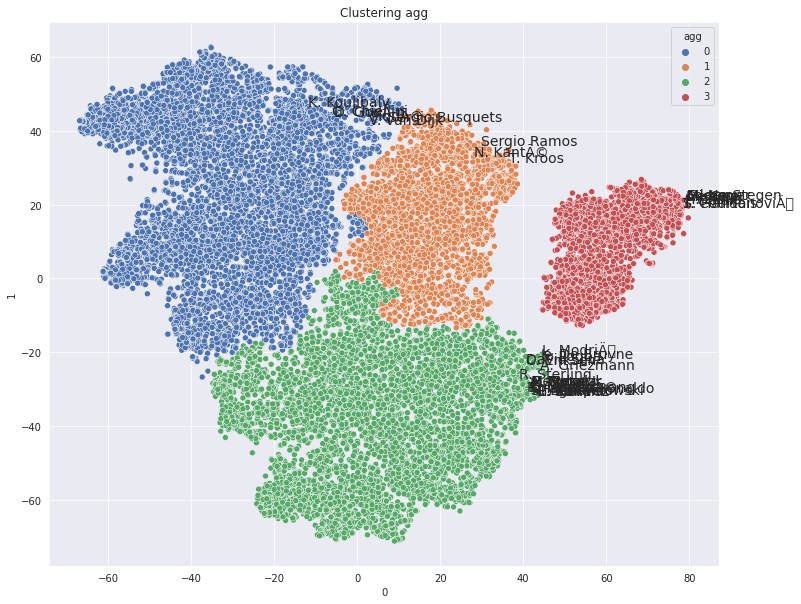

In [ ]:
lploter(df, x_tsne, cluster_tsne, method='agg', skill_1='0', skill_2='1')

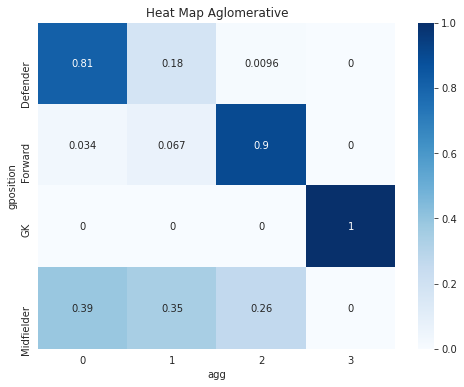

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(df['gposition'], cluster_tsne['agg'], normalize='index'),
     cmap="Blues", annot=True)
plt.title('Heat Map Aglomerative')
plt.show()

El metodo alglomerativo hace una mejor division para los delanteros, arqueros y defensores pero no para los medios.

### 5.2 PCA

PCA Para reducción de dimensión de n dimensiones a m dimensiones con `'m<<n'`

Se computan las componentes principales

 * cuando se usa decomposition.PCA :

La descomposición PCA del sklearn centra los datos pero no los normaliza 
(input data is centered but not scaled for each feature before 
applying the SVD)

por eso estandarizamos primero

In [ ]:
#std_scale = StandardScaler().fit(x)
#x_scaled = std_scale.transform(x) # numpyarray normalizado por columna


DESCOMPOSICIÓN PCA

En la descomposición podemos elegir n_components para quedarnos con una cantidad chica de componentes

la idea es que sean "bastante" menos que la dimensión de lo datos pero

que describan un buen porcentaje de la dispersión de los datos

In [ ]:
pca=PCA(n_components=2) # elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(x_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

x_projected = pca.transform(x_scaled) #numpy array
print ('tamaño de los datos: ', x_projected.shape)

proporción de varianza por componente:  [0.59273486 0.1657131 ]
proporción de varianza por componente acumulada:  [0.59273486 0.75844797]
tamaño de los datos:  (18278, 2)


In [ ]:
pcs = pca.components_  

El siguiente gráfico muestra la composición de los pesos de las dos primeras componentes principales.

In [ ]:
#Graph 1
data=[]

for i, (x_pca, y_pca) in enumerate(zip(pcs[0,:], pcs[1,:])):
    graph=go.Scatter(x=[0,x_pca],y=[0,y_pca],text=x.columns[i],
                     mode='lines+markers+text',textposition='top left',
                     textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=750,height=650,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)
#fig.show(renderer="colab")
fig.show(renderer='colab', config=config)
# iplot(fig)

In [ ]:
x_projected = pd.DataFrame(x_projected, columns=['pca_1', 'pca_2'])

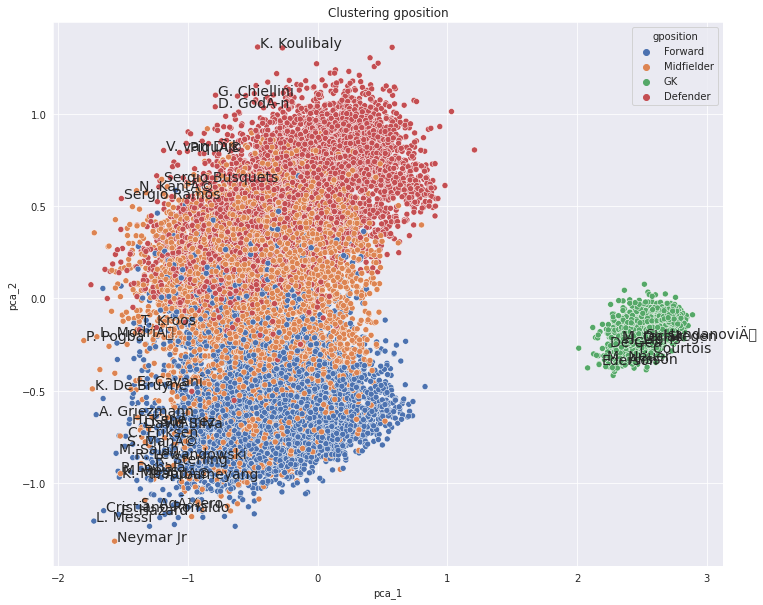

In [ ]:
lploter(df, x_projected, df, method='gposition', skill_1='pca_1', skill_2='pca_2')

#### Clustering K means

In [ ]:
cluster = KMeans(
    n_clusters=4, random_state=42, n_jobs=6, n_init=42).fit_predict(x_projected)
cluster_pca = pd.DataFrame(cluster, columns=['kmean'])

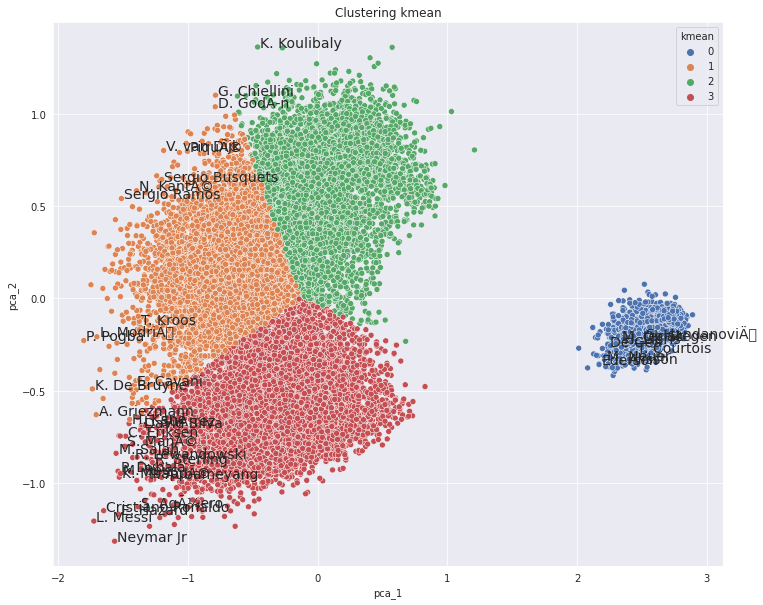

In [ ]:
# embplot(df, x_projected, cluster_pca, method='kmean')
lploter(df, x_projected, cluster_pca, method='kmean', skill_1='pca_1', skill_2='pca_2')

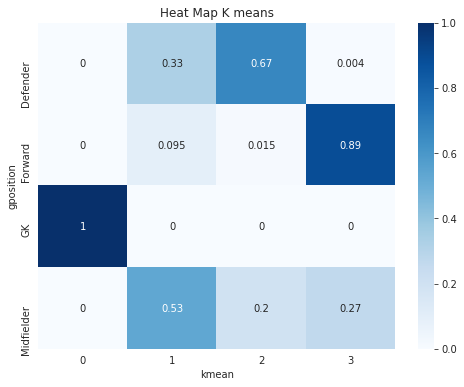

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(df['gposition'], cluster_pca['kmean'], normalize='index'),
     cmap="Blues", annot=True)
plt.title('Heat Map K means')
plt.show()

Usado K means para los 2 primeras compones hace un buen agrupamiento para los aruqeros y los delanteros pero no asi para los defensores y los medios.

#### Clustering Mean Shift

In [ ]:
ms = MeanShift(bandwidth=0.6, n_jobs=6) # 84

ms.fit(x_projected)

clusters_2 = ms.labels_
labels_unique = np.unique(clusters_2)
n_clusters_ = len(labels_unique)
print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 2


In [ ]:
cluster_pca['mshift'] = clusters_2

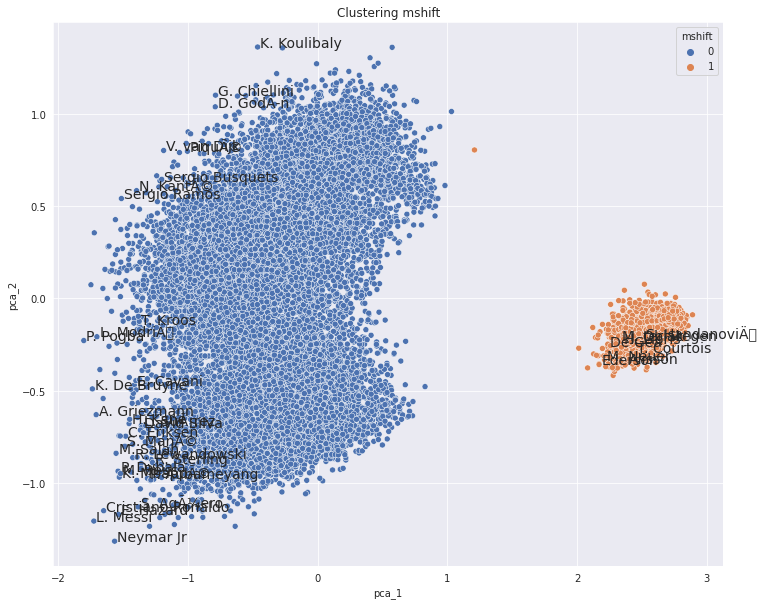

In [ ]:
#embplot(df, x_projected, cluster_pca, method='mshift')
lploter(df, x_projected, cluster_pca, method='mshift', skill_1='pca_1', skill_2='pca_2')

Mean shift no es un buen modelo ya que solo consigue 2 grupos, pero esto se debe al analisis de PCA, pues de las dos componete principales son aquellas que favorecen a la separacion de los arqueros y el resto de los jugadores pero no entre jugadores.

## 6 Clustering sin GK
---

In [ ]:
cols = [
       'overall', 'potential',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle']
       
x_filter = df[cols]
x_filter = x_filter[df.position != 'GK']
x_filter.fillna(0, inplace=True)

In [ ]:
x_filter_sc = MinMaxScaler().fit_transform(x_filter)

### 6.1 K means

In [ ]:
scores_gk = [KMeans(
    n_clusters=i+2, n_jobs=6, random_state=42
    ).fit(x_filter_sc).inertia_ for i in range(8)]

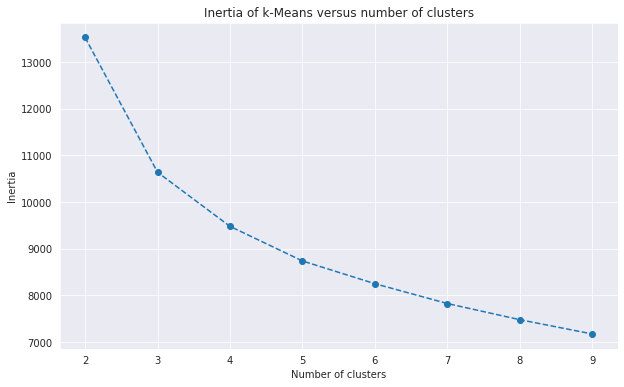

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 10), scores_gk, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.show()

El cambio mas marcado de pendiente se ve en 3

Para n_clusters = 3 El silhouette_score promedio es : 0.25277292276000385
Para n_clusters = 4 El silhouette_score promedio es : 0.21483136373912415
Para n_clusters = 5 El silhouette_score promedio es : 0.17493724327675794
Para n_clusters = 6 El silhouette_score promedio es : 0.17236543260388856


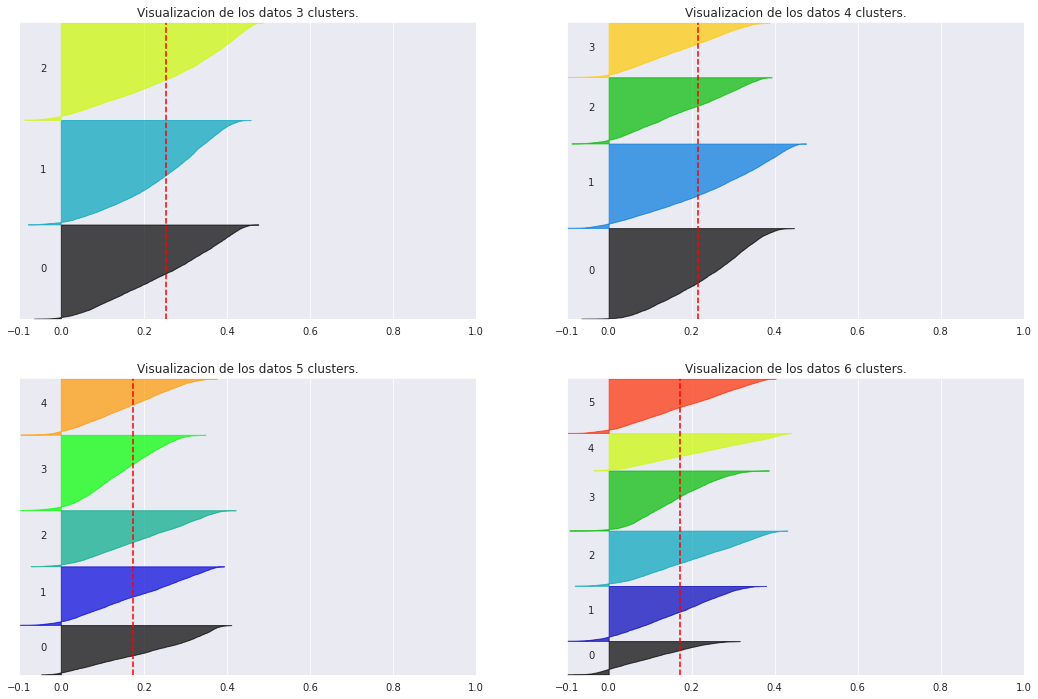

In [ ]:
range_n_clusters = [3, 4, 5, 6]
index = 0

fig = plt.figure(figsize=(18, 12))

for n_clusters in range_n_clusters:
   
    index += 1
    ax1 = plt.subplot(
        len(range_n_clusters)/2 + len(range_n_clusters)%2, 2, index)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x_filter) + (n_clusters + 1) * 10])
    clusterer = KMeans(
        n_clusters=n_clusters, random_state=42, n_jobs=4, n_init=42
        )
    cluster_labels = clusterer.fit_predict(x_filter_sc)
    silhouette_avg = silhouette_score(x_filter, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)
    ax1 = silhouette_plt(x_filter, cluster_labels, n_clusters, ax1)
   # end for

plt.show()

In [ ]:
cluster_1 = KMeans(
    n_clusters=4, random_state=42, n_jobs=6).fit_predict(x_filter_sc)
clusters_filter = pd.DataFrame(cluster_1, columns=['kmean'])

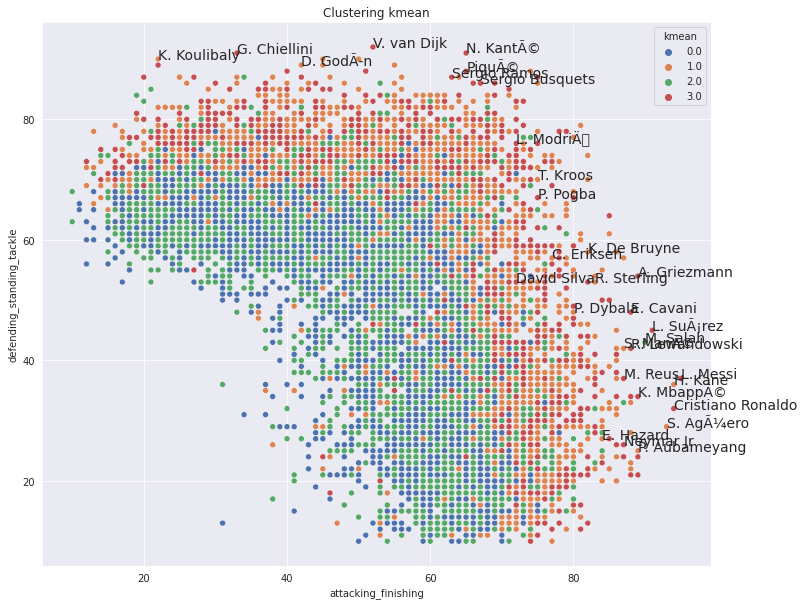

In [ ]:
# lploter(df[df.position != 'GK'], x_filter, clusters_filter, method='kmean', 
#             skill_1='attacking_finishing', 
#             skill_2='defending_standing_tackle')

lploter(df[df.position != 'GK'], x_filter, clusters_filter, method='kmean')

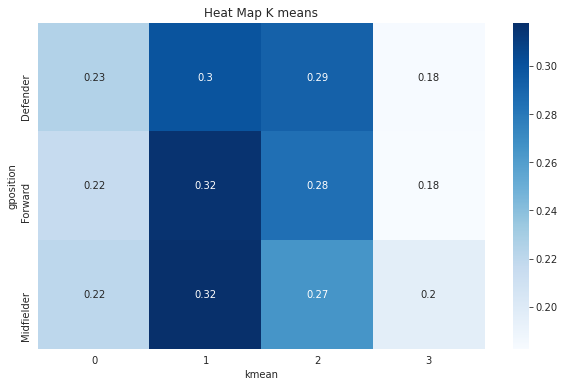

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pd.crosstab(df[df.position != 'GK']['gposition'], clusters_filter['kmean'],
            normalize='index'),
     cmap="Blues", annot=True)
plt.title('Heat Map K means')
plt.show()

De acuerdo al mapa anterior k means no esta haciendo un agrupamiento en relacion con las pocisiones de los juagadores.

Analisis por Overall de los jugadores.

Para este caso tampoco hay una buena agrupacion de k means

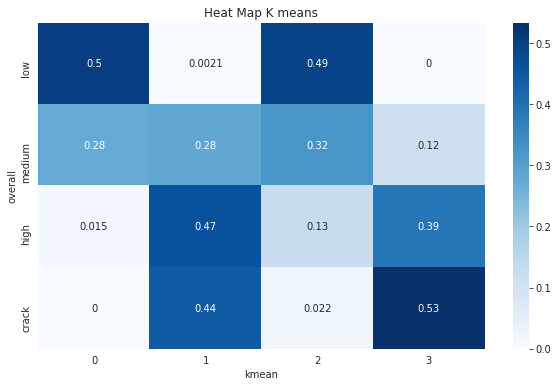

In [ ]:
bins = [0, 60, 70, 86, 100]
interval = pd.cut(
    x_filter.overall, bins=bins, labels=["low", "medium" ,"high", "crack"],
     include_lowest=True)
plt.figure(figsize=(10, 6))

sns.heatmap(
    pd.crosstab(interval, clusters_filter['kmean'], normalize='index'),
     cmap="Blues", annot=True)
plt.title('Heat Map K means')
plt.show()

### 6.2 Mean shift

In [ ]:
bandwidth = estimate_bandwidth(x_filter_sc, random_state=42, n_jobs=4)
bandwidth

1.1942606073857813

In [ ]:
ms = MeanShift(
    bandwidth=bandwidth, n_jobs=4
).fit(x_filter_sc) # 84

clusters_2 = ms.labels_
# cluster_centers = ms.cluster_centers_
labels_unique = np.unique(clusters_2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 1


In [ ]:
clusters_filter['mshift'] = clusters_2

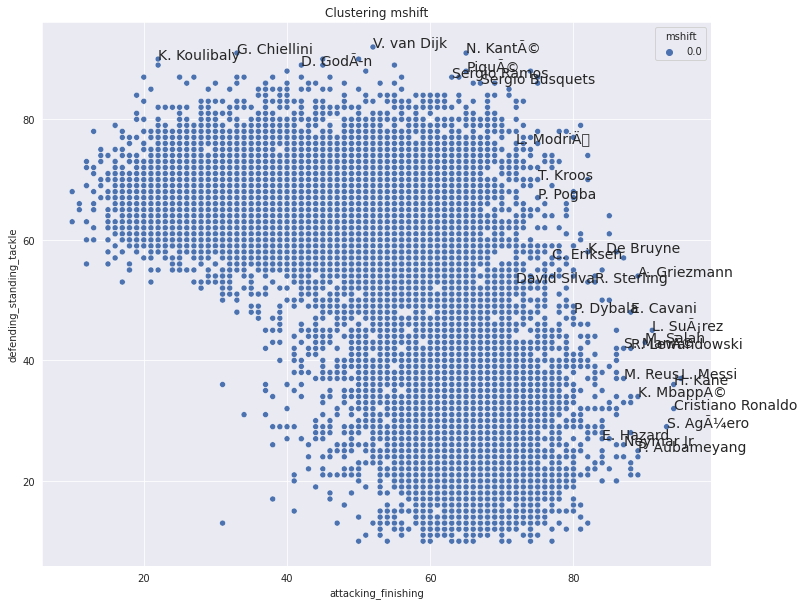

In [ ]:
#lploter(df[df.position != 'GK'], x_filter, clusters_filter, method='mshift', 
#            skill_1='attacking_finishing', 
#            skill_2='defending_standing_tackle')
lploter(df[df.position != 'GK'], x_filter, clusters_filter, method='mshift')

Para mean shift solo se encuentra un grupo sin los arqueros

Este mismo resultado se obtiene para DBSCAN

### 6.3 DBSCAN

In [ ]:
dbscan = DBSCAN(eps=5, metric='cityblock', min_samples=4).fit(x_filter_sc) # 1.3

clusters_filter['dbscan'] = dbscan.labels_
clusters_filter['dbscan'].nunique()

1

### 6.4 Agglomerative Clustering

Para n_clusters = 2 El silhouette_score promedio es : 0.33338570828608893
Para n_clusters = 3 El silhouette_score promedio es : 0.16209808309210716
Para n_clusters = 4 El silhouette_score promedio es : 0.15922222460201813
Para n_clusters = 5 El silhouette_score promedio es : 0.14741162970219043


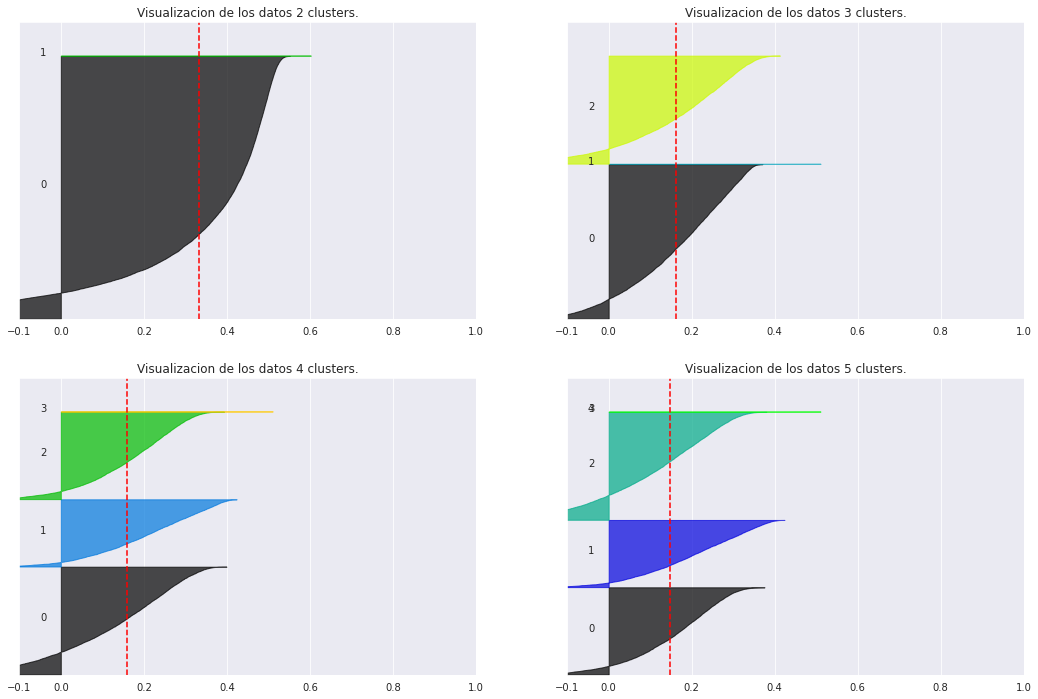

In [ ]:
range_n_clusters = [2, 3, 4, 5]
index = 0
x_filter_s =  StandardScaler().fit_transform(x_filter)
fig = plt.figure(figsize=(18, 12))

for n_clusters in range_n_clusters:
    index += 1
    ax1 = plt.subplot(
        len(range_n_clusters)/2 + len(range_n_clusters)%2, 2, index)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    clusterer = AgglomerativeClustering(
        n_clusters=n_clusters, linkage="average", affinity="cityblock"
        )
    cluster_labels = clusterer.fit_predict(x_filter_sc)
    silhouette_avg = silhouette_score(x_filter_s, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)
    ax1 = silhouette_plt(x_filter_s, cluster_labels, n_clusters, ax1)
   # end for

plt.show()


In [ ]:
agg = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="cityblock"
        ).fit(StandardScaler().fit_transform(x_filter))
clusters_filter['agg'] = agg.labels_

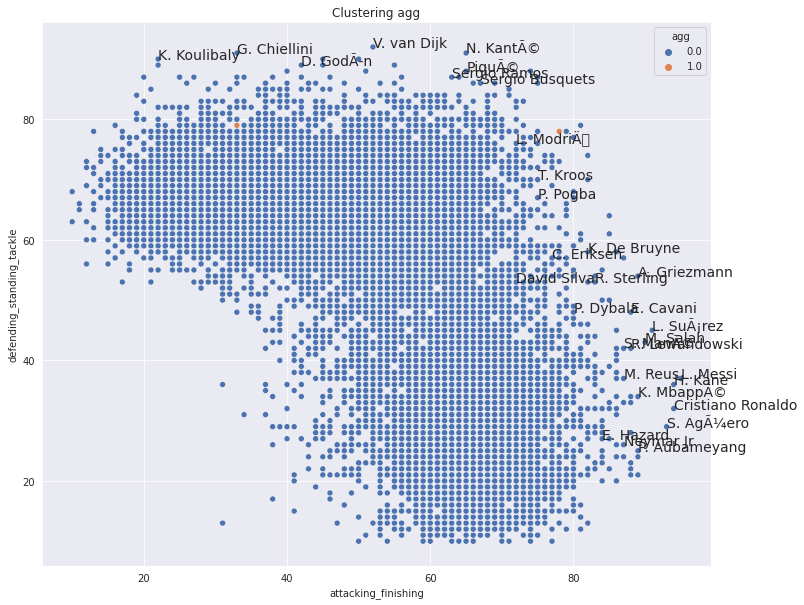

In [ ]:
#lploter(df[df.position != 'GK'], x_filter, clusters_filter, method='agg', 
#            skill_1='attacking_finishing', 
#            skill_2='defending_standing_tackle')
lploter(df[df.position != 'GK'], x_filter, clusters_filter, method='agg')

El modelo aglomerativo para clustering sin los arqueros no nos da buenos resutados.

## 7 Evaluación.
---

### 7.1 silhouette Analisys

#### Clustering Con Arqueros

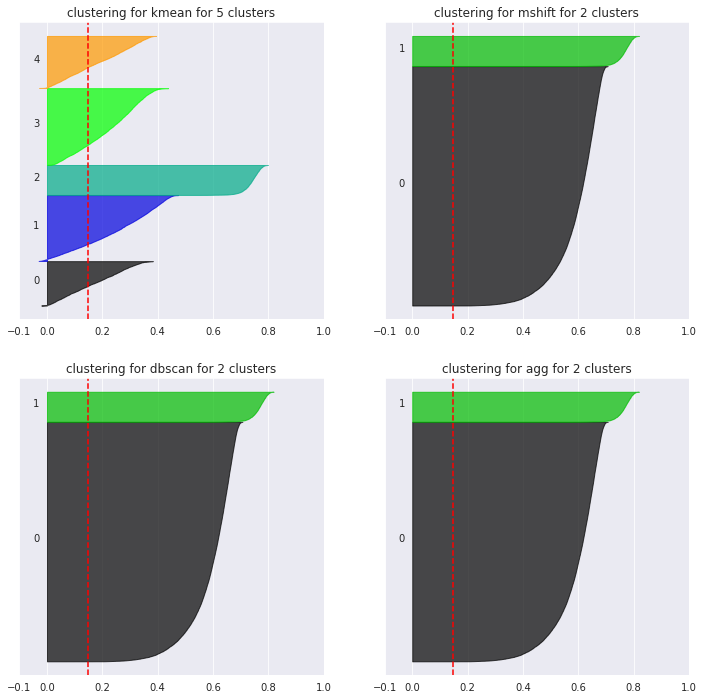

In [ ]:
fig = plt.figure(figsize=(12, 12))

index = 0
for m in ['kmean', 'mshift', 'dbscan', 'agg']:
    index += 1
    ax1 = plt.subplot(2, 2, index)
    ax1 = silhouette_plt(x, clusters[m], clusters[m].nunique(), ax1)
    ax1.set_title(f'clustering for {m} for {clusters[m].nunique()} clusters')
    
plt.show()

Si comparamos los 4 modelos empleados el que mejor resultado nos dio fue k means, el cual hacia una division por posicion. 

(ver el analisi en la seccion de analisis)

#### Clustering Sin Arqueros

DBSCAN no se muestra ya que tiene encuentra un solo grupo

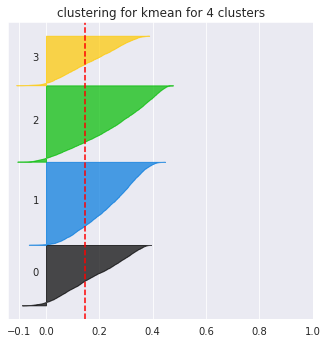

In [ ]:
fig = plt.figure(figsize=(12, 12))

index = 0
for m in ['kmean']:
    index += 1
    ax1 = plt.subplot(2, 2, index)
    ax1 = silhouette_plt(x_filter, clusters_filter[m], clusters_filter[m].nunique(), ax1)
    ax1.set_title(f'clustering for {m} for {clusters_filter[m].nunique()} clusters')
    
plt.show()

Para el caso de k means sin arqueros el unico que logra una separacion aunque su clustering es distinto al realizado por k means con los arqueros.

#### Clustering Embeddings

Para TSNE

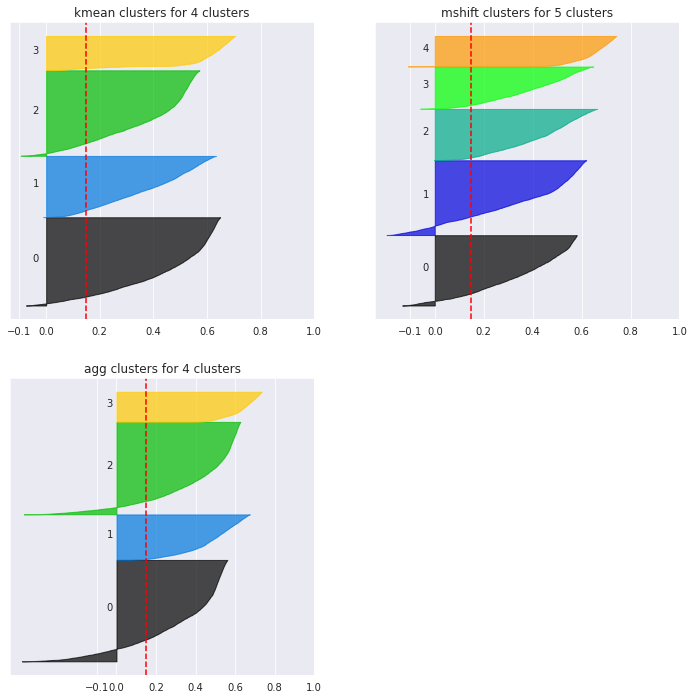

In [ ]:
fig = plt.figure(figsize=(12, 12))

index = 0
for m in ['kmean', 'mshift', 'agg']:
    index += 1
    ax1 = plt.subplot(2, 2, index)
    ax1 = silhouette_plt(x_tsne, cluster_tsne[m], cluster_tsne[m].nunique(), ax1)
    ax1.set_title(f'{m} clusters for {cluster_tsne[m].nunique()} clusters')
    
plt.show()

De acuerdo al analsis de silueta, K means tiene los grupos mejor balanceados,  pero el metodo Mean shift es el que mejor hace clustering en funcion de la posicion. 

##Para PCA

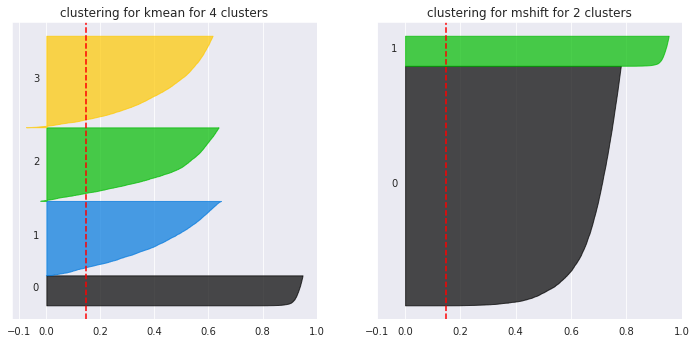

In [ ]:
fig = plt.figure(figsize=(12, 12))

index = 0
for m in ['kmean', 'mshift']:
    index += 1
    ax1 = plt.subplot(2, 2, index)
    ax1 = silhouette_plt(x_projected, cluster_pca[m], cluster_pca[m].nunique(), ax1)
    ax1.set_title(f'clustering for {m} for {cluster_pca[m].nunique()} clusters')
    
plt.show()

El que mejor separacion realiza en Mean shift pero solo lo hace entre arqueros y el resto de los jugadores, K means hacia una mejor agrupacion entre los arqueros y los delanteros del resto de los jugadores.

## 8  ¿Se realizó alguna normalización de la base? ¿Por qué ?
---

Si. Se utlizo ya que las unidades de ciertas caracterizticas no son comparables con otras, Como por ejemplo Habilidad para defender que tiene un rango de 0 y 100 y habiliad del pie menos habil que tiene un rango de 0 y 5.



In [ ]:
x.agg(['min', 'max'])

overall  potential  skill_moves  pace  shooting  passing  dribbling  \
min       48         49            1   0.0       0.0      0.0        0.0   
max       94         95            5  96.0      93.0     92.0       96.0   

     defending  physic  attacking_crossing  attacking_finishing  \
min        0.0     0.0                   5                    2   
max       90.0    90.0                  93                   95   

     attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
min                           5                        7                  3   
max                          93                       92                 90   

     skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
min                4            6                  4                   8   
max               97           94                 94                  92   

     skill_ball_control  movement_acceleration  movement_sprint_speed  \
min                   5                     12                     11   
max                  96                     97                     96   

     movement_agility  movement_reactions  movement_balance  power_shot_power  \
min                11                  21                12                14   
max                96                  96                97                95   

     power_jumping  power_stamina  power_strength  power_long_shots  \
min             19             12              20                 4   
max             95             97              97                94   

     mentality_aggression  mentality_interceptions  mentality_positioning  \
min                     9                        3                      2   
max                    95                       92                     95   

     mentality_vision  mentality_penalties  mentality_composure  \
min                 9                    7                   12   
max                94                   92                   96   

     defending_marking  defending_standing_tackle  defending_sliding_tackle  \
min                  1                          5                         3   
max                 94                         92                        90   

     goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
min                   1                     1                    1   
max                  90                    92                   93   

     goalkeeping_positioning  goalkeeping_reflexes  
min                        1                     1  
max                       91                    92

Se utilizo Min Max Scaler ya que el rango de los valores se encuentran acotados entre 0 y 100 para la mayoria de las habilidades utilizadas. 
0 y 5 para el caso de usar la pierna menos habil de los jugadores.

Ademas, Min Max permite mantener la relacion con los Outlier, a diferencia de  Standar Scaler (Normalizacion usando la media y desviacion).